Calculating for group size 1...
108 of 109
Calculating for group size 11...
99 of 109
Calculating for group size 21...
105 of 109
Calculating for group size 31...
93 of 109
Calculating for group size 41...
82 of 109
Calculating for group size 51...
102 of 109
Calculating for group size 61...
61 of 109
Calculating for group size 71...
71 of 109
Calculating for group size 81...
81 of 109
Calculating for group size 91...
91 of 109
Calculating for group size 101...
101 of 109


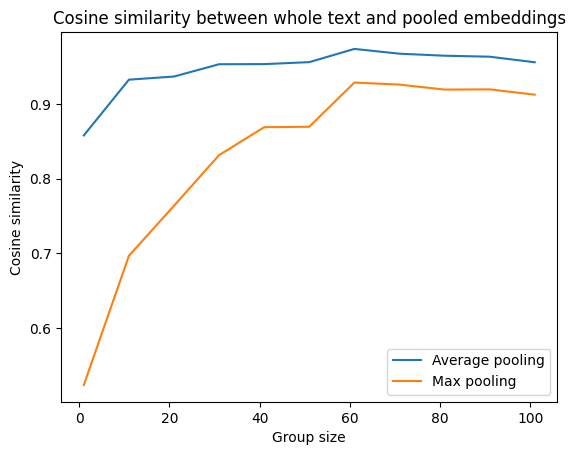

In [30]:
import os
import openai
import requests
import tiktoken
from typing import List
import numpy as np
import matplotlib.pyplot as plt


# Set your OpenAI API key from the environment variable
openai.api_key = os.environ["OPENAI_API_KEY"]
#return array of tokens
def encode(string: str, encoding_name: str = "cl100k_base") -> List[str]:
    encoding = tiktoken.get_encoding(encoding_name)
    tokens=encoding.encode(string)
    o = {}
    o['tokens']=tokens
    o['coded']=[encoding.decode([k]) for k in tokens]

    return o


# Request embeddings for a list of texts
def request_embeddings(texts: List[str]):
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {openai.api_key}",
    }
    data = {
        "input": texts,
        "model": "text-embedding-ada-002",
    }
    response = requests.post(
        "https://api.openai.com/v1/embeddings",
        headers=headers,
        json=data,
    )
    response.raise_for_status()
    return response.json()["data"]

# Pooling methods
def average_pooling(embeddings: List[List[float]]):
    return np.mean(embeddings, axis=0).tolist()

def max_pooling(embeddings: List[List[float]]):
    return np.max(embeddings, axis=0).tolist()

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

text = """Enthusiastically, the curious cat swiftly climbed atop the ancient, 
moss-covered monument, as the brilliant scientist, in a perplexed manner, 
deduced that the cryptic, inscrutable manuscript contained elusive secrets about the enigmatic, 
mystical realm where the majestic, resplendent unicorns gracefully roamed alongside the ferocious, 
untamed dragons, creating an extraordinarily harmonious, yet paradoxical scene where the vibrant, 
radiant flowers blossomed under the shimmering, iridescent moonlight."""

# Tokenize the text
token_list = encode(text)["tokens"]

# Calculate similarities for different group sizes
group_sizes = range(1, len(token_list) + 1,10)
average_similarities = []
max_similarities = []


for group_size in group_sizes:
    print(f"Calculating for group size {group_size}...")
    pooled_embeddings = []

    for i in range(0, len(token_list), group_size):
        print(f"{i} of {len(token_list)}", end="\r")
        token_group = token_list[i : i + group_size]
        token_group_embeddings = request_embeddings(token_group)
        token_group_embeddings = [embedding_data["embedding"] for embedding_data in token_group_embeddings]

        pooled_embedding = average_pooling(token_group_embeddings)
        pooled_embeddings.append(pooled_embedding)
    print("")
    average_pooled_embedding = average_pooling(pooled_embeddings)
    max_pooled_embedding = max_pooling(pooled_embeddings)

    average_similarity = cosine_similarity(whole_text_embedding, average_pooled_embedding)
    max_similarity = cosine_similarity(whole_text_embedding, max_pooled_embedding)

    average_similarities.append(average_similarity)
    max_similarities.append(max_similarity)

# Plot the results
plt.plot(group_sizes, average_similarities, label="Average pooling")
plt.plot(group_sizes, max_similarities, label="Max pooling")
plt.xlabel("Group size")
plt.ylabel("Cosine similarity")
plt.legend()
plt.title("Cosine similarity between whole text and pooled embeddings")
plt.show()